# Object Detection using YOLOv5 for Mask 😷 and No-Mask 🙂



# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


In [17]:
import os
import cv2
from google.colab.patches import cv2_imshow

## Mount Google Drive to get the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q /content/drive/MyDrive/Mask-dataset-yolov5/Mask-Wearing-Dataset.zip -d /content/

## Train
Train a **YOLOv5** model on **our Dataset** with `--data data.yaml`, starting from pretrained `--weights yolov5s.pt` for 100 epochs.


In [6]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 940 --batch 2 --epochs 70 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=70, batch_size=2, imgsz=940, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-13-gfc36064 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=

# Testing

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/Dataset/test/images/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg, imgsz=[940, 940], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-13-gfc36064 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Dataset/test/images/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg: 544x960 5 masks, Done. (0.043s)
Speed: 0.7ms pre-process, 43.4ms inference, 2.0ms NMS per image at shape (1, 3, 960, 960)
Results saved to runs/detect/exp3


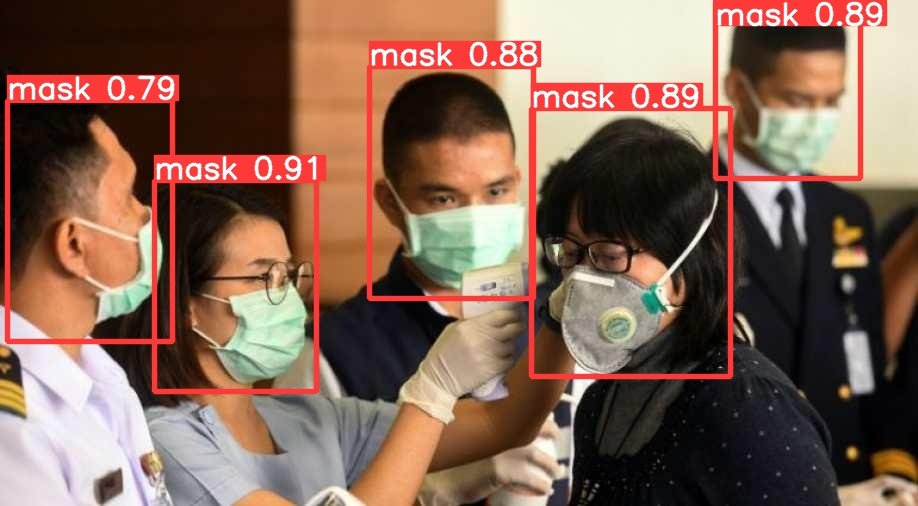

In [37]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 940 --conf 0.50 --source /content/Dataset/test/images/test_img_7.jpg

list_detect = os.listdir("/content/yolov5/runs/detect")
list_detect.sort()
f = os.path.join("/content/yolov5/runs/detect", list_detect[-1])

for filename in os.listdir(f):
  filen = os.path.join(f, filename)
  img = cv2.imread(filen)
cv2_imshow(img)

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/Dataset/train/images/10fea_8011463765e2aa28b386cf_jpg.rf.7981dc5de795ab4252631683e0de84ae.jpg, imgsz=[940, 940], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-13-gfc36064 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Dataset/train/images/10fea_8011463765e2aa28b386cf_jpg.rf.7981dc5de795ab4252631683e0de84ae.jpg: 576x960 1 mask, 1 no-mask, Done. (0.045s)
Speed: 0.8ms pre-process, 44.8ms inference, 1.7ms NMS per image at shape (1, 3, 960, 960)
Results saved to runs/detect/exp4


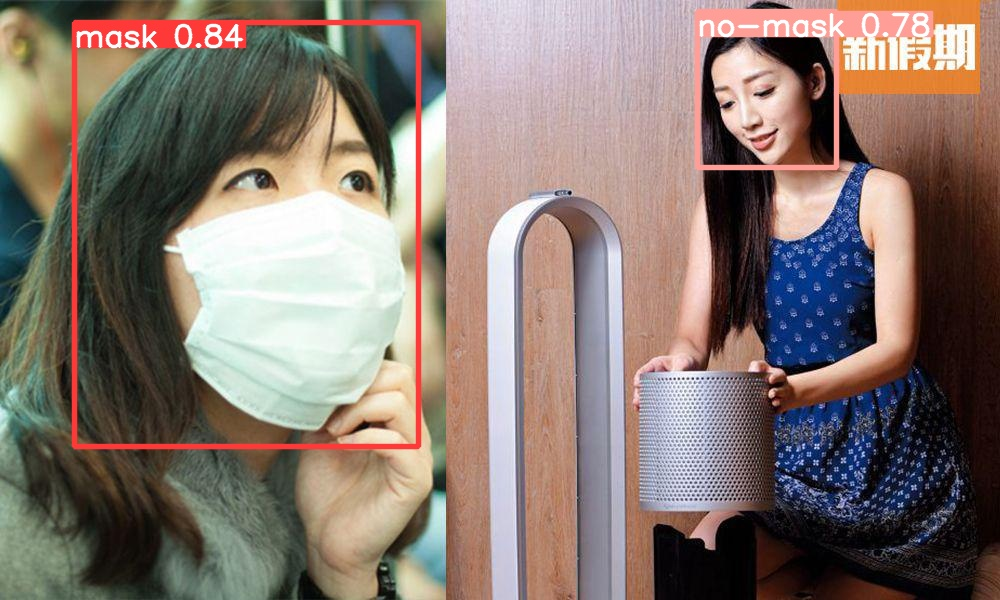

In [38]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 940 --conf 0.70 --source /content/Dataset/train/images/train_img_111.jpg

list_detect = os.listdir("/content/yolov5/runs/detect")
list_detect.sort()
f = os.path.join("/content/yolov5/runs/detect", list_detect[-1])

for filename in os.listdir(f):
  filen = os.path.join(f, filename)
  img = cv2.imread(filen)
cv2_imshow(img)